### Import neccessary Libraries

In [1]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
import numpy as np
!pip install keras
!pip install tensorflow
from keras.models import Sequential
from keras.layers import Dense


You are using pip version 10.0.1, however version 19.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 10.0.1, however version 19.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


Using TensorFlow backend.


### Import our Data CSV

In [2]:
import pandas as pd
chart = pd.read_csv('data.csv')

In [3]:
chart.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

### Remove players with zero price

In [4]:
chart = chart[chart.Value != "€0"]

In [5]:
chart.Value.value_counts()

€1.1M      431
€375K      372
€425K      354
€325K      351
€450K      343
€525K      338
€350K      325
€1.2M      324
€400K      323
€1M        318
€475K      296
€500K      294
€600K      293
€550K      285
€675K      270
€575K      261
€1.3M      260
€725K      241
€300K      240
€625K      238
€650K      225
€1.4M      221
€750K      219
€160K      206
€700K      203
€180K      202
€130K      201
€140K      200
€825K      197
€120K      193
          ... 
€72M         1
€42M         1
€63M         1
€36M         1
€56.5M       1
€76.5M       1
€41.5M       1
€51.5M       1
€54M         1
€89M         1
€102M        1
€118.5M      1
€53.5M       1
€78M         1
€64M         1
€61M         1
€40M         1
€43M         1
€53M         1
€41M         1
€58M         1
€81M         1
€62M         1
€46M         1
€83.5M       1
€44.5M       1
€45.5M       1
€68M         1
€28M         1
€93M         1
Name: Value, Length: 216, dtype: int64

### Create a Name-Postion tuple before we drop position from DF

In [6]:
name_pos = list(zip(chart.Name, chart.Position))
names_overall_score = list(zip(chart.Name, chart.Overall))

### Split data in four separate DFs for each position

In [7]:
GK_df = chart[chart.Position == "GK"]
ST_df = chart[chart.Position.isin(["ST", "LF", "RF", "CF", "RS", "LS", "LW", "RW"])]
MD_df = chart[chart.Position.isin(["RM", "LM", "CAM", "CDM", "LCM", "RCM", "RDM", "LDM", "RAM", "LAM"])]
DF_df = chart[chart.Position.isin(["CB", "LB", "RB", "RCB", "LCB", "RWB", "LWB"])]

In [8]:
GK_df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

### Regex pattern to convert Value into floats and formula for converting height to inches

In [9]:
import re
pattern = r'\d+\.?\d?'
matches = re.findall(pattern, "$600.5K")

def convert_value(value):
    pattern = r'\d+\.?\d?'
    if value.endswith("K"):
        matches = float(re.findall(pattern, value)[0])*1000
    else:
        matches = float(re.findall(pattern, value)[0])*1000000
    return matches

def convert_height(height):
    split = height.split("'")
    height = int(split[0])*12 + int(split[1])
    return height

### Function that preprocesses each DF to give us a final, clean, scaled features_df

In [10]:
def preprocess_df(data):
    final_df = data.drop(columns = ['Unnamed: 0', 'ID','Photo', 'Nationality', 'Flag','Club','Club Logo','LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'Wage', 'International Reputation',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Position', 'Preferred Foot',
                                  'Real Face', 'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until', 'Release Clause'], axis = 1)
    final_df.dropna(inplace = True)
    target = final_df['Value']
    final_df.drop(columns=['Value'], inplace=True)
    new_table = pd.concat([final_df, target], axis=1)
    weight_new = list(new_table.Weight)
    clean_weight = [int(item.replace('lbs', "")) for item in weight_new]
    new_table["Weight"] = clean_weight
    height_new = list(new_table.Height)
    final_height = [convert_height(item) for item in height_new]
    new_table["Height"] = final_height
    new_values = [convert_value(item) for item in list(new_table.Value)]
    new_table["Value"] = new_values
    
    list_body = list(new_table['Body Type'])
    names = ['Akinfenwa', 'PLAYER_BODY_TYPE_25', 'Shaqiri', 'Messi', 'Neymar', 'Courtois', 'C. Ronaldo']
    for idx, item in enumerate(list_body):
        if item in names:
            list_body[idx] = "Lean"
    new_table['Body Type'] = list_body
    test_df = new_table.set_index("Name")
    dummies_df = test_df[['Body Type', 'Work Rate']]
    target_final = test_df.Value
    test_df.drop(columns = ['Body Type', 'Work Rate', 'Value'], axis = 1, inplace = True)
    scaler = StandardScaler()
    scaled_df = pd.DataFrame(scaler.fit_transform(test_df), columns = test_df.columns, index = test_df.index)
    dummies_final = pd.get_dummies(dummies_df)
    dummies_final.drop(columns = ["Body Type_Stocky"], inplace = True)
    final_df = pd.concat([scaled_df, dummies_final], axis = 1)
    return dict(test = test_df, final = final_df, target = target_final)
    

### Preprocessing our four DF for each position, so we can run spearate models per position

In [11]:
GK_final = preprocess_df(GK_df)['final']
GK_target = preprocess_df(GK_df)['target']

len(GK_final) == len(GK_target)

True

### ST = Striker/Forward

In [12]:
ST_final = preprocess_df(ST_df)['final']
ST_target = preprocess_df(ST_df)['target']

len(ST_final) == len(ST_target)

True

### DF = Defender

In [13]:
DF_final = preprocess_df(DF_df)['final']
DF_target = preprocess_df(DF_df)['target']

len(DF_final) == len(DF_target)

True

### MD = Midfielder

In [14]:
MD_final = preprocess_df(MD_df)['final']
MD_target = preprocess_df(MD_df)['target']

len(MD_final) == len(MD_target)

True

### Check if preprocessing went well by checking for NaN values and column.info()

In [15]:
MD_final.isna().sum()

Age                         0
Overall                     0
Potential                   0
Special                     0
Weak Foot                   0
Skill Moves                 0
Height                      0
Weight                      0
Crossing                    0
Finishing                   0
HeadingAccuracy             0
ShortPassing                0
Volleys                     0
Dribbling                   0
Curve                       0
FKAccuracy                  0
LongPassing                 0
BallControl                 0
Acceleration                0
SprintSpeed                 0
Agility                     0
Reactions                   0
Balance                     0
ShotPower                   0
Jumping                     0
Stamina                     0
Strength                    0
LongShots                   0
Aggression                  0
Interceptions               0
Positioning                 0
Vision                      0
Penalties                   0
Composure 

In [16]:
MD_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5385 entries, K. De Bruyne to S. Squire
Data columns (total 53 columns):
Age                         5385 non-null float64
Overall                     5385 non-null float64
Potential                   5385 non-null float64
Special                     5385 non-null float64
Weak Foot                   5385 non-null float64
Skill Moves                 5385 non-null float64
Height                      5385 non-null float64
Weight                      5385 non-null float64
Crossing                    5385 non-null float64
Finishing                   5385 non-null float64
HeadingAccuracy             5385 non-null float64
ShortPassing                5385 non-null float64
Volleys                     5385 non-null float64
Dribbling                   5385 non-null float64
Curve                       5385 non-null float64
FKAccuracy                  5385 non-null float64
LongPassing                 5385 non-null float64
BallControl                 5385

### Write a function that runs Ridge regression with RFE to select top features that minimize RMSE

In [17]:
def MSE_test(X, y, random_state = 18):
    poly_RSME = []
    for i in range(1, len(X.columns)):
        linreg = Ridge()
        selector = RFE(linreg, n_features_to_select = i)
        selector = selector.fit(X, y)
        selected_columns = X.columns[selector.support_]
        selected_var = [column for column in selected_columns]
        X_train, X_test, y_train, y_test = train_test_split(X[selected_columns], y, random_state = random_state,  test_size=.20)
        
        crossvalidation = KFold(n_splits=5, shuffle=True, random_state=1)
        cv_10_results = np.mean(cross_val_score(linreg, X_train, y_train, cv=crossvalidation, scoring='neg_mean_squared_error'))
        cv_10_results= np.sqrt(abs(cv_10_results))
        poly_RSME.append(dict(variables = selected_var, RMSE = cv_10_results, nu_var = len( selected_var)))
    return poly_RSME

def find_best_model(model_list):
    sorted_mse = sorted(model_list, key=lambda k: k['RMSE'])
    return sorted_mse[0]

### Functions that extract top features from each model and sorts them by the coefficients in desc order

In [18]:
def extract_top_coefs(model, X, num_features = 15):
    coeffs = model.coef_.ravel()
    n = num_features
    feat_names = X.columns
    combo = list(zip(feat_names, coeffs))
    sorted_combos = sorted(combo, key = lambda x: x[1], reverse=True)
    return sorted_combos[:n]

In [19]:
def extract_forest_coefs(model, X, num_features = 15):
    coeffs = model.feature_importances_
    n = num_features
    feat_names = X.columns
    combo = list(zip(feat_names, coeffs))
    sorted_combos = sorted(combo, key = lambda x: x[1], reverse=True)
    return sorted_combos[:n]

### Functions that plot a barchart of top 10 feature below

In [20]:
def plot_top_features(model, X, name, position = None, num_features =10):
    coeffs = model.coef_.ravel()
    n = num_features
    feat_names = X.columns
    combo = list(zip(feat_names, coeffs))
    sorted_combos = sorted(combo, key = lambda x: x[1], reverse=True)
    features = [item[0] for item in sorted_combos]
    coeffi = [item[1] for item in sorted_combos]
    plt.figure(figsize=(10,6))
    plt.bar(features[:n], coeffi[:n])
    plt.xticks(rotation=90)
    plt.ylabel(name + " coefficients", fontsize = 15, color = "#073A5A")
    plt.title(name + " Top " + str(num_features) + " " + position + " attributes", fontsize = 17, color = "#073A5A")
    plt.show()

In [21]:
def plot_forest_features(model, X, name, position = None, num_features =10):
    coeffs = model.feature_importances_
    n = num_features
    feat_names = X.columns
    combo = list(zip(feat_names, coeffs))
    sorted_combos = sorted(combo, key = lambda x: x[1], reverse=True)
    features = [item[0] for item in sorted_combos]
    coeffi = [item[1] for item in sorted_combos]
    plt.figure(figsize=(10,6))
    plt.bar(features[:n], coeffi[:n])
    plt.xticks(rotation=90)
    plt.ylabel(name + " coefficients", fontsize = 15, color = "#073A5A")
    plt.title(name + " Top " + str(num_features) + " " + position + " attributes", fontsize = 17, color = "#073A5A")
    plt.show()

In [22]:
def extract_model_features(features_df, target_df, position = "GK", num_features = 15, random_state = 18):
    X = features_df
    y = target_df
    
    #Ridge Linear with RFE and CV for optimal features
    poly_model_list = MSE_test(X, y)
    
    selected_variables = find_best_model(poly_model_list)['variables']
    X_train, X_test, y_train, y_test = train_test_split(X[selected_variables], y, random_state = random_state,  test_size=.20)
    linreg = Ridge()
    linreg.fit(X_train, y_train)
    yhat = linreg.predict(X_test)
    
    RMSE = np.sqrt(mean_squared_error(y_test, yhat))
    z_score = RMSE/np.std(y_test)
    R_squared = linreg.score(X_test, y_test)
    print("{} Ridge linreg RMSE = {}, z_score = {}, R_squared = {}".format(position, RMSE, z_score, R_squared))
    
    #Plot top_15 features
    plot_top_features(linreg, X, "Ridge Regression", position = position, num_features =num_features)
    
    DF_top_linear = extract_top_coefs(linreg, X, num_features)
    linear_feat = [item[0] for item in DF_top_linear]
    linear_coef = [item[1] for item in DF_top_linear]
    balance_coef_linreg = [item/10000000 for item in linreg.coef_]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = random_state,  test_size=.20)
    #Random Forest Feature extraction
    forest = RandomForestClassifier(criterion= "entropy", n_estimators=40, max_depth=10, min_samples_leaf = 10)
    forest.fit(X_train, y_train.astype(int))
    print("{} Random Forest = {}".format(position, forest.score(X_test, y_test.astype(int))))
    
    plot_forest_features(forest, X, "Random Forest", position = position, num_features =num_features)
    
    DF_top_forest = extract_forest_coefs(forest, X, num_features)
    forest_feat = [item[0] for item in DF_top_forest]
    forest_coef = [item[1] for item in DF_top_forest]
    
    #SVM Feature extraction
    svr_lin = SVR(kernel='linear', C=1e3)
    y_svm_hat = svr_lin.fit(X_train, y_train).predict(X_test)
    
    RMSE = np.sqrt(mean_squared_error(y_test, y_svm_hat))
    z_score = RMSE/np.std(y_test)
    R_squared = svr_lin.score(X_test, y_test)
    print("{} SVM RMSE = {}, z_score = {}, R_squared = {}".format(position, RMSE, z_score, R_squared))
    
    plot_top_features(svr_lin, X, "SVM Linear", position = position, num_features =num_features)
    
    DF_top_SVM = extract_top_coefs(svr_lin, X, num_features)
    SVM_feat = [item[0] for item in DF_top_SVM]
    SVM_coef = [item[1] for item in DF_top_SVM]
    
    balance_coef_svm = [item/1000000 for item in svr_lin.coef_]
    
    #create DF with combined features
    combined_feat = list(set(linear_feat + forest_feat + SVM_feat))
    comb_DF = features_df[combined_feat]
    comb_DF["selector"] = comb_DF.sum(axis = 1)
    comb_DF['selector'] = comb_DF['selector'] -  2*(comb_DF['Age']) 
    comb_DF['selector'] = [(item - comb_DF.selector.mean()) / (comb_DF.selector.max() - comb_DF.selector.min()) for item in comb_DF.selector]
    
    #Run XGboost on final data
    X = comb_DF
    y = target_df

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = random_state,  test_size=.20)
    xgb_lin = xgb.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
    xgb_lin.fit(X_train, y_train)
    
    xgb_lin_hat = xgb_lin.fit(X_train, y_train).predict(X_test)

    RMSE = np.sqrt(mean_squared_error(y_test, xgb_lin_hat))
    z_score = RMSE/np.std(y_test)
    R_squared = xgb_lin.score(X_test, y_test)
    print("{} XGboost RMSE = {}, z_score = {}, R_squared = {}".format(position, RMSE, z_score, R_squared))
    
    plot_forest_features(forest, X, "XGBoost", position = position, num_features =num_features)
    
    xgb_coefs = xgb_lin.feature_importances_
    new_selector = pd.DataFrame(comb_DF.dot(xgb_coefs.T), columns = ["final_selector"])
    DF_final = pd.concat([comb_DF, new_selector], axis = 1)
    
    DF_tuples = list(zip(DF_final.index, round(DF_final.final_selector, 2), DF_target))
    sorted_by_selector = sorted(DF_tuples, key = lambda x: x[1], reverse = True)
    return sorted_by_selector

DF Ridge linreg RMSE = 2830099.5164689748, z_score = 0.6682438083156128, R_squared = 0.5534502126478449


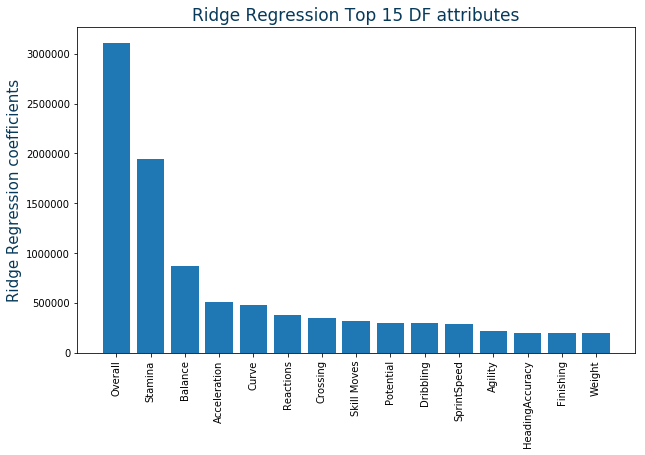

DF Random Forest = 0.18961038961038962


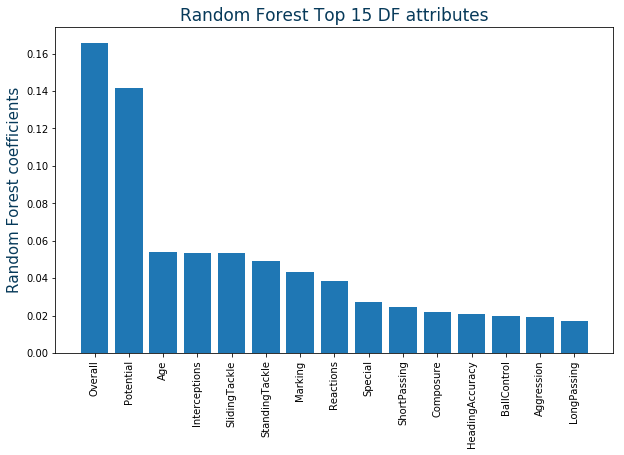

DF SVM RMSE = 3647653.363108687, z_score = 0.8612848278283234, R_squared = 0.25818844535273267


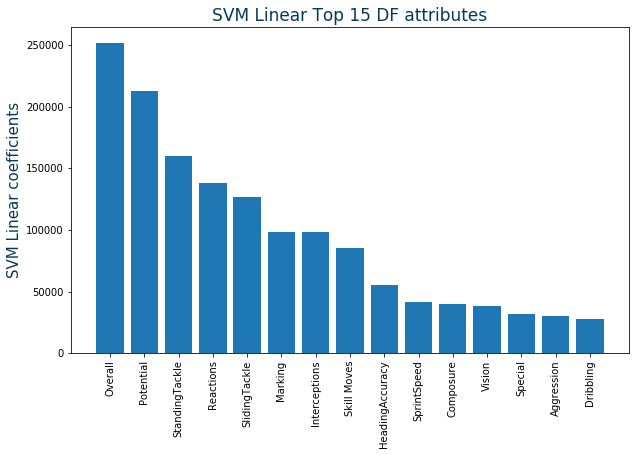

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

DF XGboost RMSE = 346497.66564648657, z_score = 0.08181511579952118, R_squared = 0.9933062868267111


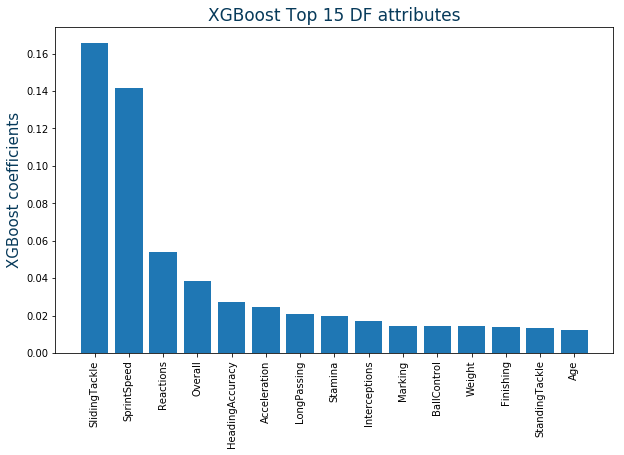

In [23]:
top_defenders = extract_model_features(DF_final, DF_target, position = "DF", num_features = 15, random_state = 18)

In [24]:
top_defenders[:15]

[('Sergio Ramos', 2.57, 51000000.0),
 ('Marcelo', 2.39, 43000000.0),
 ('D. Godín', 2.3, 44000000.0),
 ('G. Chiellini', 2.23, 27000000.0),
 ('Thiago Silva', 2.23, 24000000.0),
 ('M. Hummels', 2.2, 46000000.0),
 ('J. Vertonghen', 2.16, 34000000.0),
 ('Jordi Alba', 2.15, 38000000.0),
 ('Filipe Luís', 2.12, 21500000.0),
 ('Naldo', 2.08, 9000000.0),
 ('Piqué', 2.05, 34000000.0),
 ('Azpilicueta', 2.05, 35000000.0),
 ('L. Bonucci', 2.03, 30000000.0),
 ('Alex Sandro', 2.01, 36500000.0),
 ('T. Alderweireld', 2.01, 39000000.0)]

In [25]:
top_defenders_overall = []
for item in top_defenders:
    for overall in names_overall_score:
        if item[0] == overall[0]:
            new = dict(name = item[0], selector = item[1], overall = overall[1], price = item[2])
            top_defenders_overall.append(new)

In [26]:
top_defenders_overall[:20]

[{'name': 'Sergio Ramos',
  'selector': 2.57,
  'overall': 91,
  'price': 51000000.0},
 {'name': 'Marcelo', 'selector': 2.39, 'overall': 88, 'price': 43000000.0},
 {'name': 'Marcelo', 'selector': 2.39, 'overall': 80, 'price': 43000000.0},
 {'name': 'Marcelo', 'selector': 2.39, 'overall': 76, 'price': 43000000.0},
 {'name': 'D. Godín', 'selector': 2.3, 'overall': 90, 'price': 44000000.0},
 {'name': 'G. Chiellini',
  'selector': 2.23,
  'overall': 89,
  'price': 27000000.0},
 {'name': 'Thiago Silva',
  'selector': 2.23,
  'overall': 88,
  'price': 24000000.0},
 {'name': 'M. Hummels', 'selector': 2.2, 'overall': 88, 'price': 46000000.0},
 {'name': 'J. Vertonghen',
  'selector': 2.16,
  'overall': 87,
  'price': 34000000.0},
 {'name': 'Jordi Alba', 'selector': 2.15, 'overall': 87, 'price': 38000000.0},
 {'name': 'Filipe Luís', 'selector': 2.12, 'overall': 85, 'price': 21500000.0},
 {'name': 'Naldo', 'selector': 2.08, 'overall': 85, 'price': 9000000.0},
 {'name': 'Naldo', 'selector': 2.08, 

In [27]:
DF_selectors = [item['selector'] for item in top_defenders_overall]
DF_overalls = [item['overall'] for item in top_defenders_overall]
DF_price = [item['price'] for item in top_defenders_overall]

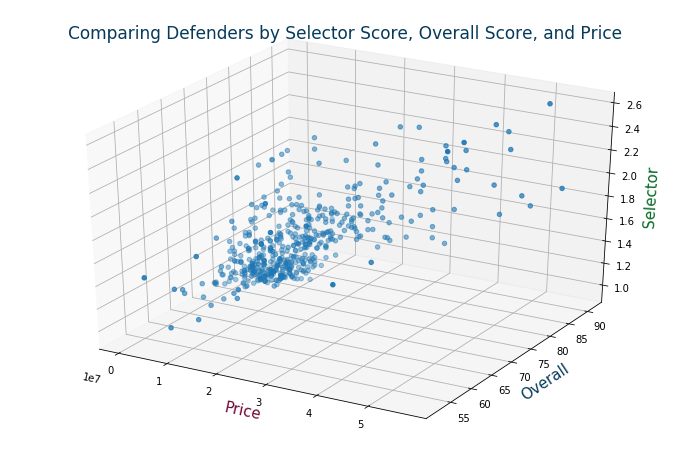

In [28]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)

fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(DF_price[:500], DF_overalls[:500], DF_selectors[:500])

ax.set_xlabel('Price', fontsize = 15, color = "#6D0735")
ax.set_ylabel('Overall', fontsize = 15, color = "#073A5A")
ax.set_zlabel('Selector', fontsize = 15, color = "#056825")
ax.set_title('Comparing Defenders by Selector Score, Overall Score, and Price', fontsize = 17, color = "#073A5A")

plt.show()

Striker Ridge linreg RMSE = 5119600.879952486, z_score = 0.7162743795409657, R_squared = 0.486951013213205


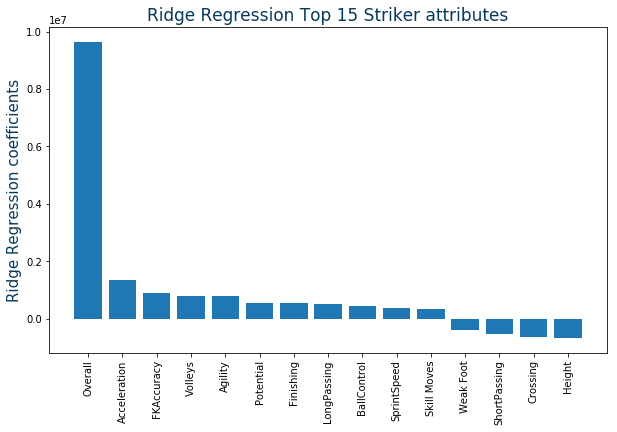

Striker Random Forest = 0.19497784342688332


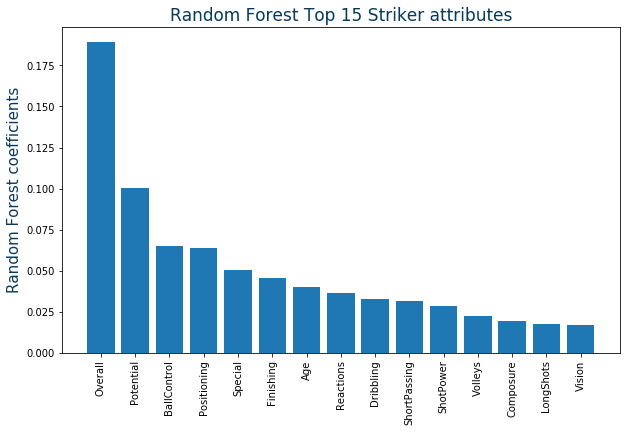

Striker SVM RMSE = 6486120.462246518, z_score = 0.9074617374795638, R_squared = 0.17651319501057172


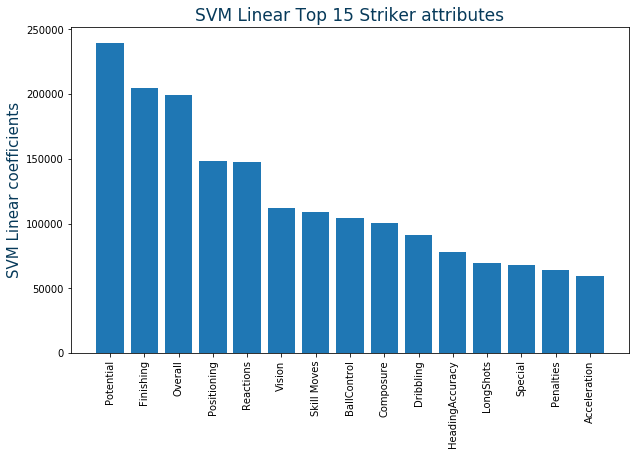

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

Striker XGboost RMSE = 1267900.296459888, z_score = 0.17738970663178757, R_squared = 0.9685328919810884


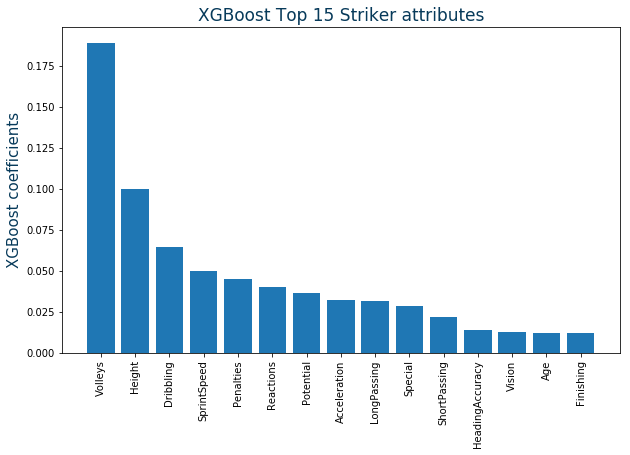

In [29]:
top_strikers = extract_model_features(ST_final, ST_target, position = "Striker", num_features = 15, random_state = 18)

In [30]:
top_strikers_overall = []
for item in top_strikers:
    for overall in names_overall_score:
        if item[0] == overall[0]:
            new = dict(name = item[0], selector = item[1], overall = overall[1], price = item[2])
            top_strikers_overall.append(new)

In [31]:
top_strikers_overall[:15]

[{'name': 'Cristiano Ronaldo',
  'selector': 2.92,
  'overall': 94,
  'price': 44000000.0},
 {'name': 'L. Messi', 'selector': 2.77, 'overall': 94, 'price': 51000000.0},
 {'name': 'L. Suárez', 'selector': 2.48, 'overall': 91, 'price': 43000000.0},
 {'name': 'L. Suárez', 'selector': 2.48, 'overall': 72, 'price': 43000000.0},
 {'name': 'L. Suárez', 'selector': 2.48, 'overall': 63, 'price': 43000000.0},
 {'name': 'Neymar Jr', 'selector': 2.44, 'overall': 92, 'price': 27000000.0},
 {'name': 'R. Lewandowski',
  'selector': 2.32,
  'overall': 90,
  'price': 24000000.0},
 {'name': 'E. Hazard', 'selector': 2.31, 'overall': 91, 'price': 46000000.0},
 {'name': 'S. Agüero', 'selector': 2.28, 'overall': 89, 'price': 34000000.0},
 {'name': 'E. Cavani', 'selector': 2.26, 'overall': 89, 'price': 38000000.0},
 {'name': 'G. Bale', 'selector': 2.2, 'overall': 88, 'price': 36500000.0},
 {'name': 'Z. Ibrahimović',
  'selector': 2.2,
  'overall': 85,
  'price': 32000000.0},
 {'name': 'P. Dybala', 'selector'

In [32]:
ST_selectors = [item['selector'] for item in top_strikers_overall]
ST_overalls = [item['overall'] for item in top_strikers_overall]
ST_price = [item['price'] for item in top_strikers_overall]

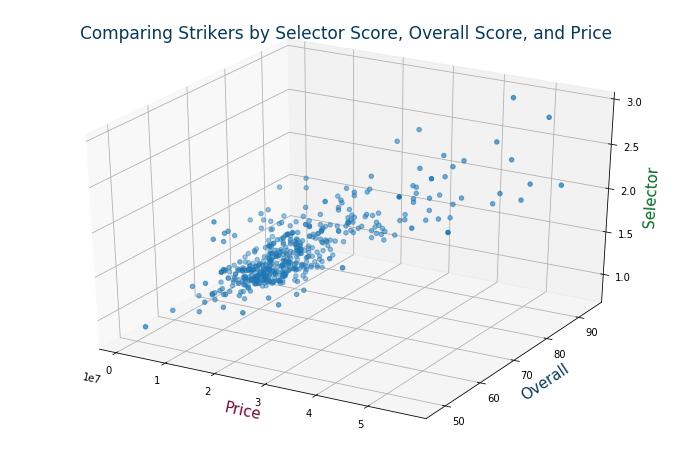

In [33]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)

fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(ST_price[:500], ST_overalls[:500], ST_selectors[:500])

ax.set_xlabel('Price', fontsize = 15, color = "#6D0735")
ax.set_ylabel('Overall', fontsize = 15, color = "#073A5A")
ax.set_zlabel('Selector', fontsize = 15, color = "#056825")
ax.set_title('Comparing Strikers by Selector Score, Overall Score, and Price', fontsize = 17, color = "#073A5A")

plt.show()

MD Ridge linreg RMSE = 4288242.236944289, z_score = 0.6877836836930508, R_squared = 0.5269536044456173


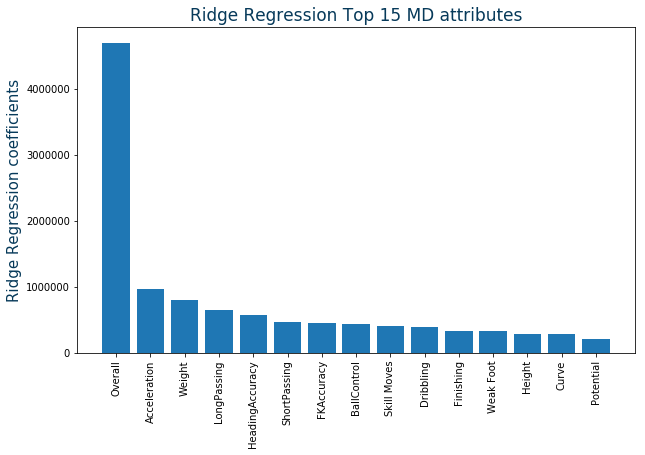

MD Random Forest = 0.1467038068709378


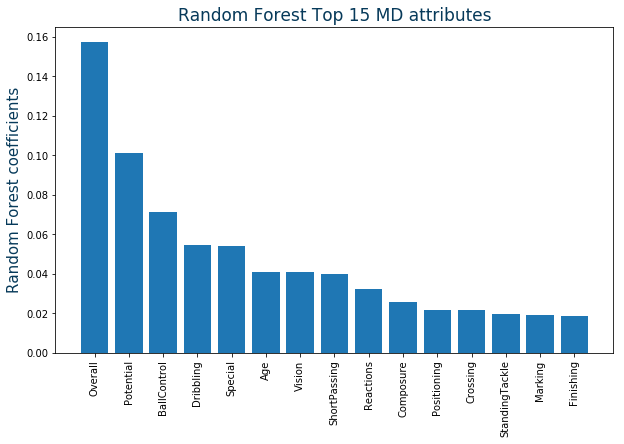

MD SVM RMSE = 5322847.71594743, z_score = 0.8537222497067221, R_squared = 0.2711583203556931


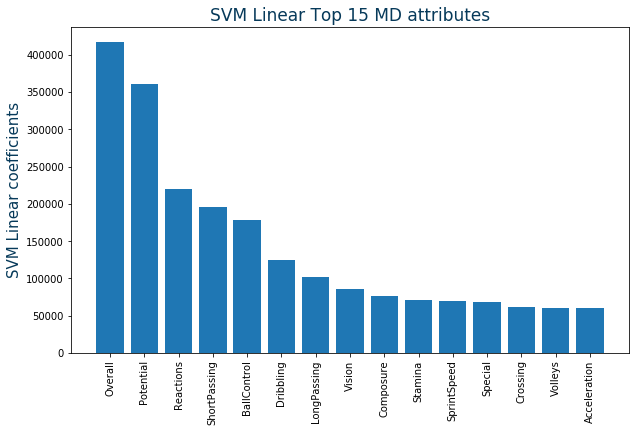

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

MD XGboost RMSE = 768989.7426366891, z_score = 0.1233369219108562, R_squared = 0.9847880036935555


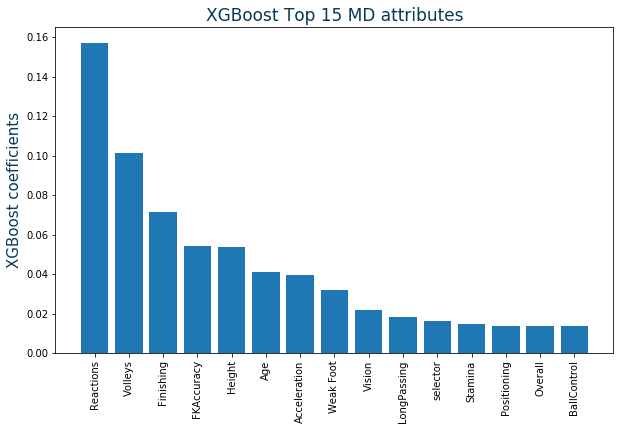

In [34]:
top_mids = extract_model_features(MD_final, MD_target, position = "MD", num_features = 15, random_state = 18)

In [35]:
top_mids_overall = []
for item in top_mids:
    for overall in names_overall_score:
        if item[0] == overall[0]:
            new = dict(name = item[0], selector = item[1], overall = overall[1], price = item[2])
            top_mids_overall.append(new)

In [36]:
top_mids[:15]

[('L. Modrić', 2.16, 44000000.0),
 ('K. De Bruyne', 2.08, 51000000.0),
 ('David Silva', 2.0, 46000000.0),
 ('T. Kroos', 1.94, 27000000.0),
 ('A. Griezmann', 1.93, 24000000.0),
 ('M. Hamšík', 1.93, 35000000.0),
 ('P. Pogba', 1.87, 36500000.0),
 ('C. Eriksen', 1.83, 44500000.0),
 ('I. Rakitić', 1.8, 30000000.0),
 ('Fernandinho', 1.77, 15500000.0),
 ('S. Khedira', 1.76, 31500000.0),
 ('R. Nainggolan', 1.75, 24500000.0),
 ('I. Perišić', 1.74, 31500000.0),
 ('Sergio Busquets', 1.73, 57000000.0),
 ('A. Vidal', 1.73, 36500000.0)]

In [37]:
MD_selectors = [item['selector'] for item in top_mids_overall]
MD_overalls = [item['overall'] for item in top_mids_overall]
MD_price = [item['price'] for item in top_mids_overall]

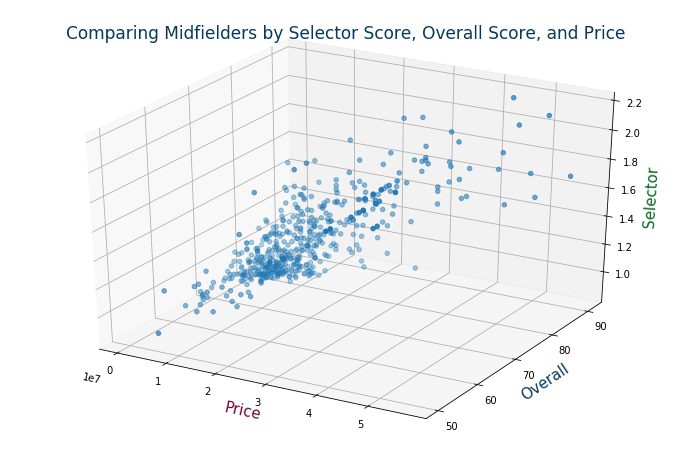

In [38]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)

fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(MD_price[:500], MD_overalls[:500], MD_selectors[:500])

ax.set_xlabel('Price', fontsize = 15, color = "#6D0735")
ax.set_ylabel('Overall', fontsize = 15, color = "#073A5A")
ax.set_zlabel('Selector', fontsize = 15, color = "#056825")
ax.set_title('Comparing Midfielders by Selector Score, Overall Score, and Price', fontsize = 17, color = "#073A5A")

plt.show()

GK Ridge linreg RMSE = 4351061.661978027, z_score = 0.7900837283848094, R_squared = 0.37576770214155847


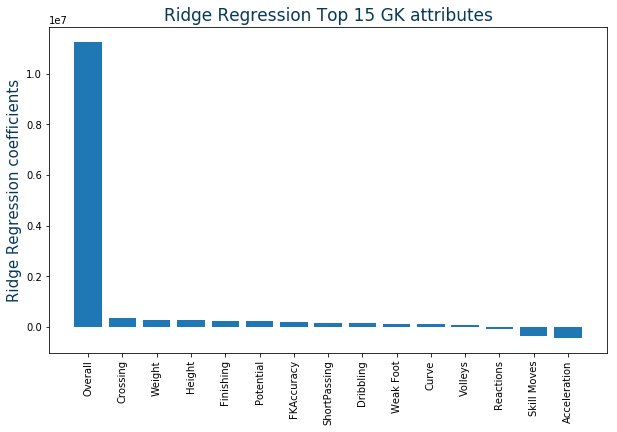

GK Random Forest = 0.12562814070351758


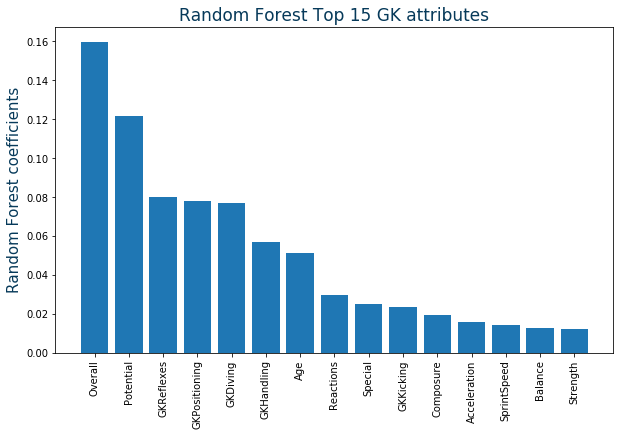

GK SVM RMSE = 5304417.529305755, z_score = 0.9631980201720236, R_squared = 0.07224957393669373


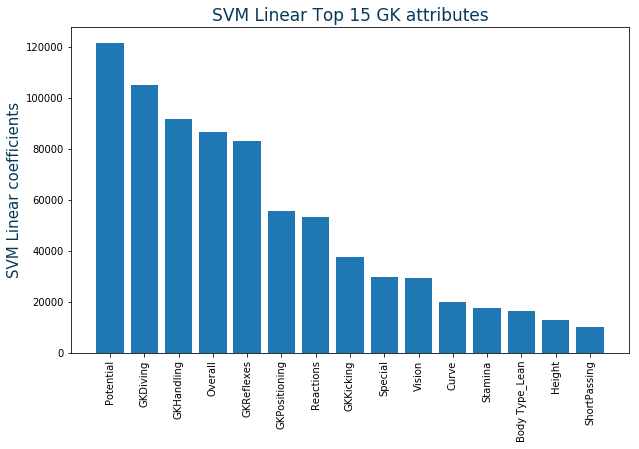

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

GK XGboost RMSE = 2184390.6735449038, z_score = 0.39665067095803397, R_squared = 0.8426682452285414


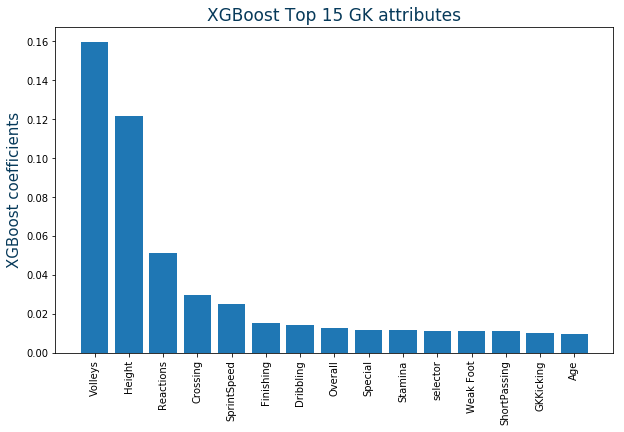

In [39]:
top_GK = extract_model_features(GK_final, GK_target, position = "GK", num_features = 15, random_state = 18)

In [41]:
top_GK_overall = []
for item in top_GK:
    for overall in names_overall_score:
        if item[0] == overall[0]:
            new = dict(name = item[0], selector = item[1], overall = overall[1], price = item[2])
            top_GK_overall.append(new)

In [42]:
top_GK_overall[:15]

[{'name': 'G. Buffon', 'selector': 2.25, 'overall': 88, 'price': 51000000.0},
 {'name': 'M. Neuer', 'selector': 2.19, 'overall': 89, 'price': 43000000.0},
 {'name': 'De Gea', 'selector': 2.17, 'overall': 91, 'price': 51000000.0},
 {'name': 'J. Oblak', 'selector': 1.95, 'overall': 90, 'price': 44000000.0},
 {'name': 'S. Handanovič',
  'selector': 1.93,
  'overall': 88,
  'price': 57000000.0},
 {'name': 'M. ter Stegen',
  'selector': 1.9,
  'overall': 89,
  'price': 27000000.0},
 {'name': 'T. Courtois', 'selector': 1.88, 'overall': 89, 'price': 46000000.0},
 {'name': 'Ederson', 'selector': 1.86, 'overall': 86, 'price': 34000000.0},
 {'name': 'H. Lloris', 'selector': 1.81, 'overall': 88, 'price': 24000000.0},
 {'name': 'K. Navas', 'selector': 1.81, 'overall': 87, 'price': 38000000.0},
 {'name': 'Alisson', 'selector': 1.78, 'overall': 85, 'price': 34000000.0},
 {'name': 'Pepe Reina', 'selector': 1.69, 'overall': 83, 'price': 34000000.0},
 {'name': 'Sergio Asenjo',
  'selector': 1.68,
  'ov

In [43]:
GK_selectors = [item['selector'] for item in top_GK_overall]
GK_overalls = [item['overall'] for item in top_GK_overall]
GK_price = [item['price'] for item in top_GK_overall]

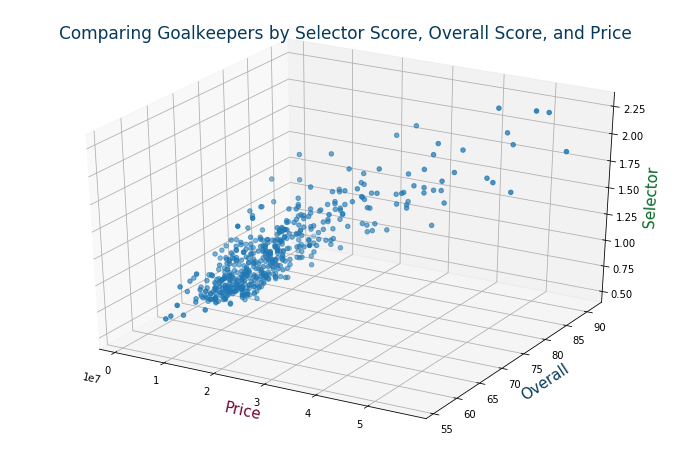

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(GK_price[:500], GK_overalls[:500], GK_selectors[:500])

ax.set_xlabel('Price', fontsize = 15, color = "#6D0735")
ax.set_ylabel('Overall', fontsize = 15, color = "#073A5A")
ax.set_zlabel('Selector', fontsize = 15, color = "#056825")
ax.set_title('Comparing Goalkeepers by Selector Score, Overall Score, and Price', fontsize = 17, color = "#073A5A")

plt.show()

## Write our player recommendation Algo

In [45]:
sorted_players_selector = [top_GK_overall, top_defenders_overall, top_mids_overall, top_strikers_overall]

In [46]:
def pick_player_by_selector(budget, position, count = 3):
    count = count
    empty = []
    names = [item[0] for item in name_pos if item[1] == position]
    STs = ["ST", "LF", "RF", "CF", "RS", "LS", "LW", "RW"]
    MDs = ["RM", "LM", "CAM", "CDM", "LCM", "RCM", "RDM", "LDM", "RAM", "LAM"]
    DFs = ["CB", "LB", "RB", "RCB", "LCB", "RWB", "LWB"]
    if position == "GK":
        keepers = sorted_players_selector[0]
        for item in keepers:
            if item['name'] in names and item['price'] <= budget and count > 0:
                empty.append(item)
                count -= 1
    elif position in DFs:
        defenders = sorted_players_selector[1]
        for item in defenders:
            if item['name'] in names and item['price'] <= budget and count > 0:
                empty.append(item)
                count -= 1
    elif position in MDs:
        mids = sorted_players_selector[2]
        for item in mids:
            if item['name'] in names and item['price'] <= budget and count > 0:
                empty.append(item)
                count -= 1
    elif position in STs:
        strikers = sorted_players_selector[3]
        for item in strikers:
            if item['name'] in names and item['price'] <= budget and count > 0:
                empty.append(item)
                count -= 1             
    return empty

In [48]:
pick_player_by_selector(75000000, "LW", 10)

[{'name': 'Neymar Jr', 'selector': 2.44, 'overall': 92, 'price': 27000000.0},
 {'name': 'Coutinho', 'selector': 1.96, 'overall': 88, 'price': 50000000.0},
 {'name': 'Isco', 'selector': 1.86, 'overall': 88, 'price': 44500000.0},
 {'name': 'L. Insigne', 'selector': 1.85, 'overall': 88, 'price': 34000000.0},
 {'name': 'L. Sané', 'selector': 1.83, 'overall': 86, 'price': 38000000.0},
 {'name': 'L. Sané', 'selector': 1.83, 'overall': 74, 'price': 38000000.0},
 {'name': 'I. Piatti', 'selector': 1.66, 'overall': 80, 'price': 12500000.0},
 {'name': 'A. Martial', 'selector': 1.65, 'overall': 84, 'price': 34000000.0},
 {'name': 'D. Perotti', 'selector': 1.44, 'overall': 81, 'price': 21500000.0},
 {'name': 'M. Rashford', 'selector': 1.43, 'overall': 81, 'price': 18500000.0}]

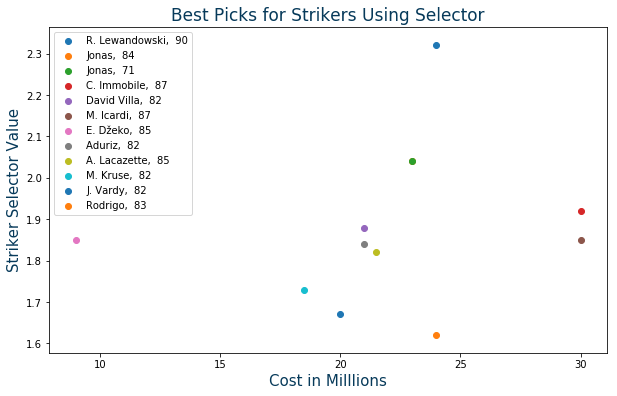

In [54]:
plt.figure(figsize = (10, 6))
for idx, val in enumerate(pick_player_by_selector(30000000, "ST", 12)):
    plt.scatter(val['price']/1000000, val['selector'] ,label = val['name'] + ",  " + str(val['overall']))
    plt.xlabel("Cost in Milllions", fontsize = 15, color = "#073A5A")
    plt.ylabel("Striker Selector Value", fontsize = 15, color = "#073A5A")
    plt.title("Best Picks for Strikers Using Selector", fontsize = 17, color = "#073A5A")
    plt.legend()
    
 

### Build Team Selector by Selector Coef Stats

In [55]:
sorted_players_selector = [top_GK_overall, top_defenders_overall, top_mids_overall, top_strikers_overall]

In [56]:
def pick_team_by_selector(budget, DF = 4, MD = 4, ST = 2, GK_coef = 0.05, DF_coef = 0.2, MD_coef = 0.40, ST_coef = 0.35):
    #split budget accordingly per position
    GK_budget = budget*GK_coef
    DF_budget = budget*DF_coef
    MD_budget = budget*MD_coef
    ST_budget = budget*ST_coef
    
    #Create proper count for each position
    GK_count = 1
    DF_count = DF
    ST_count = ST+1
    MD_count = MD+1
    
    #Kreate our list of players per position
    keepers = sorted_players_selector[0]
    defenders = sorted_players_selector[1]
    mids = sorted_players_selector[2]
    strikers = sorted_players_selector[3]
    
    #Begin building final team
    list_of_names = []
    final_team = []
    for item in keepers:
        if GK_count > 0 and item['price'] <= GK_budget and item['name'] not in list_of_names:
            item['position'] = "GK"
            final_team.append(item)
            list_of_names.append(item['name'])
            GK_budget -= item['price']
            GK_count -= 1
            DF_budget += GK_budget
    for item in defenders:
        if DF_count > 0 and item['price'] <= DF_budget/DF_count and item['name'] not in list_of_names:
            item['position'] = "DF"
            final_team.append(item)
            list_of_names.append(item['name'])
            DF_budget -= item['price']
            DF_count -= 1        
    for item in mids:
        while MD_count == MD+1:
            MD_budget = MD_budget + DF_budget
            MD_count -= 1
        if MD_count > 0 and item['price'] <= MD_budget/MD_count and item['name'] not in list_of_names:
            item['position'] = "MD"
            final_team.append(item)
            list_of_names.append(item['name'])
            MD_budget -= item['price']
            MD_count -= 1
    for item in strikers:
        while ST_count == ST+1:
            ST_budget = ST_budget + MD_budget
            ST_count -= 1
        if ST_count > 0 and item['price'] <= ST_budget/ST_count and item['name'] not in list_of_names:
            item['position'] = "ST"
            final_team.append(item)
            list_of_names.append(item['name'])
            ST_budget -= item['price']
            ST_count -= 1
    leftover_budget = GK_budget + DF_budget + MD_budget + ST_budget
    rating_avg = round(sum([item['selector'] for item in final_team])/len(final_team), 3)
    overall_avg = round(sum([item['overall'] for item in final_team])/len(final_team), 3)
    return dict(team=final_team, budget_left = leftover_budget, AVG_selector=rating_avg, AVG_overall = overall_avg)

In [57]:
team_100Mil_selector = pick_team_by_selector(1000000000, DF = 4, MD = 4, ST = 2, GK_coef = 0.05, DF_coef = 0.2, MD_coef = 0.40, ST_coef = 0.35)

In [58]:
pd.DataFrame.from_dict(team_100Mil_selector['team'])

,name,overall,position,price,selector
0,M. Neuer,89,GK,43000000.0,2.19
1,Sergio Ramos,91,DF,51000000.0,2.57
2,Marcelo,88,DF,43000000.0,2.39
3,D. Godín,90,DF,44000000.0,2.30
4,G. Chiellini,89,DF,27000000.0,2.23
5,L. Modrić,91,MD,44000000.0,2.16
6,K. De Bruyne,91,MD,51000000.0,2.08
7,David Silva,90,MD,46000000.0,2.00
8,T. Kroos,90,MD,27000000.0,1.94
9,Cristiano Ronaldo,94,ST,44000000.0,2.92


In [59]:
team_100Mil_selector

{'team': [{'name': 'M. Neuer',
   'selector': 2.19,
   'overall': 89,
   'price': 43000000.0,
   'position': 'GK'},
  {'name': 'Sergio Ramos',
   'selector': 2.57,
   'overall': 91,
   'price': 51000000.0,
   'position': 'DF'},
  {'name': 'Marcelo',
   'selector': 2.39,
   'overall': 88,
   'price': 43000000.0,
   'position': 'DF'},
  {'name': 'D. Godín',
   'selector': 2.3,
   'overall': 90,
   'price': 44000000.0,
   'position': 'DF'},
  {'name': 'G. Chiellini',
   'selector': 2.23,
   'overall': 89,
   'price': 27000000.0,
   'position': 'DF'},
  {'name': 'L. Modrić',
   'selector': 2.16,
   'overall': 91,
   'price': 44000000.0,
   'position': 'MD'},
  {'name': 'K. De Bruyne',
   'selector': 2.08,
   'overall': 91,
   'price': 51000000.0,
   'position': 'MD'},
  {'name': 'David Silva',
   'selector': 2.0,
   'overall': 90,
   'price': 46000000.0,
   'position': 'MD'},
  {'name': 'T. Kroos',
   'selector': 1.94,
   'overall': 90,
   'price': 27000000.0,
   'position': 'MD'},
  {'nam

### Build Team Selector by Overall Stats

In [60]:
GK_Overall = sorted(top_GK_overall, key = lambda item: item['overall'], reverse= True) 
DF_Overall = sorted(top_defenders_overall, key = lambda item: item['overall'], reverse= True) 
MD_Overall = sorted(top_mids_overall, key = lambda item: item['overall'], reverse= True) 
ST_Overall = sorted(top_strikers_overall, key = lambda item: item['overall'], reverse= True) 

In [61]:
ST_Overall[:15]

[{'name': 'Cristiano Ronaldo',
  'selector': 2.92,
  'overall': 94,
  'price': 44000000.0,
  'position': 'ST'},
 {'name': 'L. Messi',
  'selector': 2.77,
  'overall': 94,
  'price': 51000000.0,
  'position': 'ST'},
 {'name': 'Neymar Jr', 'selector': 2.44, 'overall': 92, 'price': 27000000.0},
 {'name': 'L. Suárez', 'selector': 2.48, 'overall': 91, 'price': 43000000.0},
 {'name': 'E. Hazard', 'selector': 2.31, 'overall': 91, 'price': 46000000.0},
 {'name': 'L. Suárez', 'selector': -0.45, 'overall': 91, 'price': 1200000.0},
 {'name': 'R. Lewandowski',
  'selector': 2.32,
  'overall': 90,
  'price': 24000000.0},
 {'name': 'S. Agüero', 'selector': 2.28, 'overall': 89, 'price': 34000000.0},
 {'name': 'E. Cavani', 'selector': 2.26, 'overall': 89, 'price': 38000000.0},
 {'name': 'P. Dybala', 'selector': 2.18, 'overall': 89, 'price': 57000000.0},
 {'name': 'H. Kane', 'selector': 2.13, 'overall': 89, 'price': 51000000.0},
 {'name': 'G. Bale', 'selector': 2.2, 'overall': 88, 'price': 36500000.0},

In [62]:
sorted_players_overall = [GK_Overall, DF_Overall, MD_Overall, ST_Overall]

In [63]:
def pick_team_by_overall(budget, DF = 4, MD = 4, ST = 2, GK_coef = 0.05, DF_coef = 0.2, MD_coef = 0.40, ST_coef = 0.35):
    #split budget accordingly per position
    GK_budget = budget*GK_coef
    DF_budget = budget*DF_coef
    MD_budget = budget*MD_coef
    ST_budget = budget*ST_coef
    
    #Create proper count for each position
    GK_count = 1
    DF_count = DF
    ST_count = ST+1
    MD_count = MD+1
    
    #Kreate our list of players per position
    keepers = sorted_players_overall[0]
    defenders = sorted_players_overall[1]
    mids = sorted_players_overall[2]
    strikers = sorted_players_overall[3]
    
    #Begin building final team
    list_of_names = []
    final_team = []
    for item in keepers:
        if GK_count > 0 and item['price'] <= GK_budget and item['name'] not in list_of_names:
            item['position'] = "GK"
            final_team.append(item)
            list_of_names.append(item['name'])
            GK_budget -= item['price']
            GK_count -= 1
            DF_budget += GK_budget
    for item in defenders:
        if DF_count > 0 and item['price'] <= DF_budget/DF_count and item['name'] not in list_of_names:
            item['position'] = "DF"
            final_team.append(item)
            list_of_names.append(item['name'])
            DF_budget -= item['price']
            DF_count -= 1        
    for item in mids:
        while MD_count == MD+1:
            MD_budget = MD_budget + DF_budget
            MD_count -= 1
        if MD_count > 0 and item['price'] <= MD_budget/MD_count and item['name'] not in list_of_names:
            item['position'] = "MD"
            final_team.append(item)
            list_of_names.append(item['name'])
            MD_budget -= item['price']
            MD_count -= 1
    for item in strikers:
        while ST_count == ST+1:
            ST_budget = ST_budget + MD_budget
            ST_count -= 1
        if ST_count > 0 and item['price'] <= ST_budget/ST_count and item['name'] not in list_of_names:
            item['position'] = "ST"
            final_team.append(item)
            list_of_names.append(item['name'])
            ST_budget -= item['price']
            ST_count -= 1
    leftover_budget = GK_budget + DF_budget + MD_budget + ST_budget
    rating_avg = round(sum([item['selector'] for item in final_team])/len(final_team), 3)
    overall_avg = round(sum([item['overall'] for item in final_team])/len(final_team), 3)
    return dict(team=final_team, budget_left = leftover_budget, AVG_selector=rating_avg, AVG_overall = overall_avg)

In [64]:
team_100Mil_overall = pick_team_by_overall(1000000000, DF = 4, MD = 4, ST = 2, GK_coef = 0.05, DF_coef = 0.2, MD_coef = 0.40, ST_coef = 0.35)

In [65]:
pd.DataFrame.from_dict(team_100Mil_overall['team'])

,name,overall,position,price,selector
0,J. Oblak,90,GK,44000000.0,1.95
1,Sergio Ramos,91,DF,51000000.0,2.57
2,D. Godín,90,DF,44000000.0,2.30
3,G. Chiellini,89,DF,27000000.0,2.23
4,Marcelo,88,DF,43000000.0,2.39
5,L. Modrić,91,MD,44000000.0,2.16
6,K. De Bruyne,91,MD,51000000.0,2.08
7,L. Suárez,91,MD,4400000.0,0.21
8,David Silva,90,MD,46000000.0,2.00
9,Cristiano Ronaldo,94,ST,44000000.0,2.92


In [66]:
team_100Mil_overall

{'team': [{'name': 'J. Oblak',
   'selector': 1.95,
   'overall': 90,
   'price': 44000000.0,
   'position': 'GK'},
  {'name': 'Sergio Ramos',
   'selector': 2.57,
   'overall': 91,
   'price': 51000000.0,
   'position': 'DF'},
  {'name': 'D. Godín',
   'selector': 2.3,
   'overall': 90,
   'price': 44000000.0,
   'position': 'DF'},
  {'name': 'G. Chiellini',
   'selector': 2.23,
   'overall': 89,
   'price': 27000000.0,
   'position': 'DF'},
  {'name': 'Marcelo',
   'selector': 2.39,
   'overall': 88,
   'price': 43000000.0,
   'position': 'DF'},
  {'name': 'L. Modrić',
   'selector': 2.16,
   'overall': 91,
   'price': 44000000.0,
   'position': 'MD'},
  {'name': 'K. De Bruyne',
   'selector': 2.08,
   'overall': 91,
   'price': 51000000.0,
   'position': 'MD'},
  {'name': 'L. Suárez',
   'selector': 0.21,
   'overall': 91,
   'price': 4400000.0,
   'position': 'MD'},
  {'name': 'David Silva',
   'selector': 2.0,
   'overall': 90,
   'price': 46000000.0,
   'position': 'MD'},
  {'nam

### COMPARE TWO MODELS

In [67]:
selector45 = pick_team_by_selector(45000000)

In [68]:
overall45 = pick_team_by_overall(45000000)

In [69]:
selector45

{'team': [{'name': 'M. Dituro',
   'selector': 0.81,
   'overall': 73,
   'price': 2100000.0,
   'position': 'GK'},
  {'name': 'D. Srna',
   'selector': 1.88,
   'overall': 80,
   'price': 1700000.0,
   'position': 'DF'},
  {'name': 'C. Maggio',
   'selector': 1.41,
   'overall': 75,
   'price': 775000.0,
   'position': 'DF'},
  {'name': 'G. Gönül',
   'selector': 1.37,
   'overall': 76,
   'price': 3000000.0,
   'position': 'DF'},
  {'name': 'D. Limberský',
   'selector': 1.36,
   'overall': 76,
   'price': 2200000.0,
   'position': 'DF'},
  {'name': 'D. Alli',
   'selector': 1.57,
   'overall': 84,
   'price': 4200000.0,
   'position': 'MD'},
  {'name': 'J. Farfán',
   'selector': 1.23,
   'overall': 79,
   'price': 3600000.0,
   'position': 'MD'},
  {'name': 'Gelson Martins',
   'selector': 1.19,
   'overall': 82,
   'price': 4800000.0,
   'position': 'MD'},
  {'name': 'G. Moreno',
   'selector': 1.19,
   'overall': 77,
   'price': 6500000.0,
   'position': 'MD'},
  {'name': 'A. Góm

In [70]:
overall45

{'team': [{'name': 'Sergio García',
   'selector': -0.34,
   'overall': 77,
   'price': 1600000.0,
   'position': 'GK'},
  {'name': 'J. Rodríguez',
   'selector': 0.11,
   'overall': 88,
   'price': 2100000.0,
   'position': 'DF'},
  {'name': 'T. Müller',
   'selector': -0.36,
   'overall': 86,
   'price': 600000.0,
   'position': 'DF'},
  {'name': 'Paulinho',
   'selector': 0.68,
   'overall': 85,
   'price': 3400000.0,
   'position': 'DF'},
  {'name': 'Saúl',
   'selector': 0.31,
   'overall': 85,
   'price': 2000000.0,
   'position': 'DF'},
  {'name': 'L. Suárez',
   'selector': 0.21,
   'overall': 91,
   'price': 4400000.0,
   'position': 'MD'},
  {'name': 'H. Kane',
   'selector': -0.26,
   'overall': 89,
   'price': 350000.0,
   'position': 'MD'},
  {'name': 'Fernandinho',
   'selector': 0.63,
   'overall': 86,
   'price': 4300000.0,
   'position': 'MD'},
  {'name': 'Naldo',
   'selector': -0.3,
   'overall': 85,
   'price': 650000.0,
   'position': 'MD'},
  {'name': 'E. Džeko',


In [71]:
def plot_compareteams(start_budget = 5000000, top_budget = 100000000, increments = 5000000):
    team_selector = []
    team_overall = []
    budgets = list(range(start_budget, top_budget, increments))
    for budget in budgets:
        selector = pick_team_by_selector(budget)
        overall = pick_team_by_overall(budget)
        selec_dic = dict(AVG_selector = selector['AVG_selector'], AVG_overall = selector['AVG_overall'], starting_budget = budget, budget_left = selector['budget_left'], team_length = len(selector['team']))
        team_selector.append(selec_dic)
        overall_dic = dict(AVG_selector = overall['AVG_selector'], AVG_overall = overall['AVG_overall'], starting_budget = budget, budget_left = overall['budget_left'], team_length = len(overall['team']))
        team_overall.append(overall_dic)
    return [team_selector, team_overall]

In [98]:
plot_100Mil = plot_compareteams(15000000, 125000000, 5000000)

In [99]:
plot_100Mil

[[{'AVG_selector': 1.111,
   'AVG_overall': 75.182,
   'starting_budget': 15000000,
   'budget_left': 2575000.0,
   'team_length': 11},
  {'AVG_selector': 1.174,
   'AVG_overall': 75.455,
   'starting_budget': 20000000,
   'budget_left': 1175000.0,
   'team_length': 11},
  {'AVG_selector': 1.225,
   'AVG_overall': 76.364,
   'starting_budget': 25000000,
   'budget_left': 5075000.0,
   'team_length': 11},
  {'AVG_selector': 1.229,
   'AVG_overall': 76.909,
   'starting_budget': 30000000,
   'budget_left': 10025000.0,
   'team_length': 11},
  {'AVG_selector': 1.316,
   'AVG_overall': 78.273,
   'starting_budget': 35000000,
   'budget_left': 9525000.0,
   'team_length': 11},
  {'AVG_selector': 1.339,
   'AVG_overall': 78.091,
   'starting_budget': 40000000,
   'budget_left': 7075000.0,
   'team_length': 11},
  {'AVG_selector': 1.392,
   'AVG_overall': 78.636,
   'starting_budget': 45000000,
   'budget_left': 8424999.999999998,
   'team_length': 11},
  {'AVG_selector': 1.472,
   'AVG_overa

### COmpare efficiency of Selector vs Overall Algorithms

In [100]:
selec_budg = [item['budget_left'] for item in plot_100Mil[0]]
selec_overall = [item['AVG_overall'] for item in plot_100Mil[0]]
selec_selector = [item['AVG_selector'] for item in plot_100Mil[0]]

overall_budg = [item['budget_left'] for item in plot_100Mil[1]]
overall_overall = [item['AVG_overall'] for item in plot_100Mil[1]]
overall_selector = [item['AVG_selector'] for item in plot_100Mil[1]]

In [101]:
len(selec_overall)

22

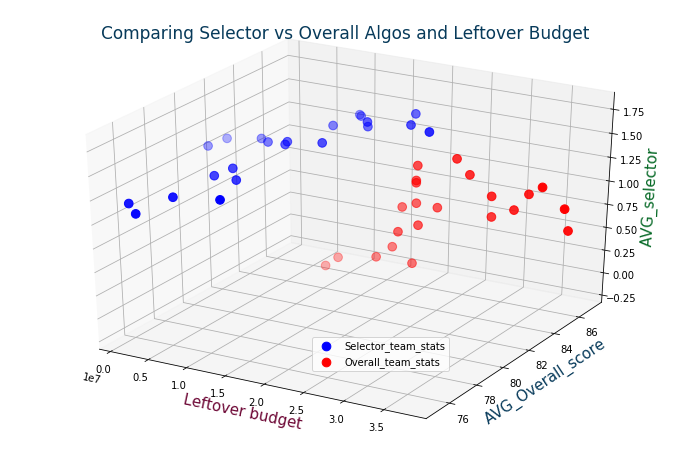

In [102]:
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(selec_budg, selec_overall, selec_selector, color = 'b', s=75, label = "Selector_team_stats")
ax.scatter(overall_budg, overall_overall , overall_selector, color = 'r', s=75, label = "Overall_team_stats")
ax.set_xlabel('Leftover budget', fontsize = 15, color = "#6D0735")
ax.set_ylabel('AVG_Overall_score', fontsize = 15, color = "#073A5A")
ax.set_zlabel('AVG_selector', fontsize = 15, color = "#056825")
ax.set_title('Comparing Selector vs Overall Algos and Leftover Budget', fontsize = 17, color = "#073A5A")

plt.legend(bbox_to_anchor=(0.45, 0.25), loc=2, borderaxespad=.0)
plt.show()



### Pick individual players by Overall Stat

In [103]:
def pick_player_by_overall(budget, position, count = 3):
    count = count
    empty = []
    names = [item[0] for item in name_pos if item[1] == position]
    STs = ["ST", "LF", "RF", "CF", "RS", "LS", "LW", "RW"]
    MDs = ["RM", "LM", "CAM", "CDM", "LCM", "RCM", "RDM", "LDM", "RAM", "LAM"]
    DFs = ["CB", "LB", "RB", "RCB", "LCB", "RWB", "LWB"]
    if position == "GK":
        keepers = sorted_players_overall[0]
        for item in keepers:
            if item['name'] in names and item['price'] <= budget and count > 0:
                empty.append(item)
                count -= 1
    elif position in DFs:
        defenders = sorted_players_overall[1]
        for item in defenders:
            if item['name'] in names and item['price'] <= budget and count > 0:
                empty.append(item)
                count -= 1
    elif position in MDs:
        mids = sorted_players_overall[2]
        for item in mids:
            if item['name'] in names and item['price'] <= budget and count > 0:
                empty.append(item)
                count -= 1
    elif position in STs:
        strikers = sorted_players_overall[3]
        for item in strikers:
            if item['name'] in names and item['price'] <= budget and count > 0:
                empty.append(item)
                count -= 1             
    return empty

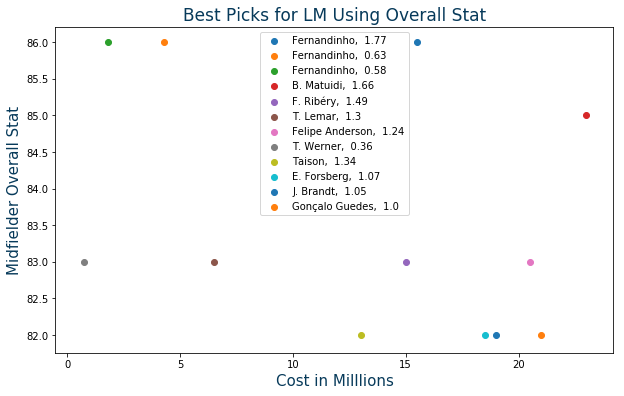

In [104]:
plt.figure(figsize = (10, 6))
for idx, val in enumerate(pick_player_by_overall(25000000, "LM", 12)):
    plt.scatter(val['price']/1000000, val['overall'] ,label = val['name'] + ",  " + str(val['selector']))
    plt.xlabel("Cost in Milllions", fontsize = 15, color = "#073A5A")
    plt.ylabel("Midfielder Overall Stat", fontsize = 15, color = "#073A5A")
    plt.title("Best Picks for LM Using Overall Stat", fontsize = 17, color = "#073A5A")
    plt.legend()

In [90]:
Kevin_team = pick_team_by_overall(120000000, DF = 4, MD = 4, ST = 2, GK_coef = 0.05, DF_coef = 0.2, MD_coef = 0.45, ST_coef = 0.30)

In [91]:
pd.DataFrame.from_dict(Kevin_team['team'])

,name,overall,position,price,selector
0,J. Rodríguez,88,GK,2700000.0,-0.40
1,Marcelo,88,DF,6000000.0,0.80
2,L. Sané,86,DF,3800000.0,0.80
3,T. Müller,86,DF,600000.0,-0.36
4,Naldo,85,DF,9000000.0,2.08
5,L. Suárez,91,MD,4400000.0,0.21
6,H. Kane,89,MD,350000.0,-0.26
7,Fernandinho,86,MD,15500000.0,1.77
8,Roberto Firmino,86,MD,30000000.0,1.71
9,A. Sánchez,85,ST,22000000.0,1.86


## Look into Napsack Later

In [ ]:
# !pip install knapsack

### Deep Learning NNs

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

X = DF_final
y = DF_target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 18,  test_size=.20)

model = Sequential()
# Adding the input layer and the first hidden layer
model.add(Dense(30, activation = 'tanh', input_dim = 54))
# Adding the second hidden layer
model.add(Dense(22, activation = 'relu'))
# Adding the third hidden layer
model.add(Dense(15, activation = 'tanh'))
model.add(Dense(7, activation = 'tanh'))
# Adding the output layer
model.add(Dense(1, activation = 'linear'))
#model.add(Dense(1))
# Compiling the ANN
model.compile(optimizer = 'sgd', loss = 'mean_squared_error', metrics = ['mse'])
# Fitting the ANN to the Training set
model.fit(X_train, y_train, batch_size = 32,epochs = 100, validation_data=(X_test, y_test))



In [ ]:
model.evaluate(X_test, y_test)